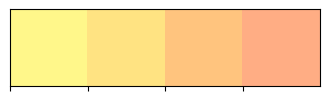

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns
from sklearn.impute import SimpleImputer ## HAndling Missing Values
# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.cluster import (
    KMeans, AgglomerativeClustering, DBSCAN, MeanShift,
    SpectralClustering, AffinityPropagation, OPTICS
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

# set the color palette
palette = sns.color_palette(["#FFF78A",'#FFE382','#FFC47E','#FFAD84'])
sns.palplot(palette) # print color palette

In [54]:
data = pd.read_csv("E:\\projects\\internship_project\\notebooks\\data\\cleaned_data.csv")

In [55]:
data.shape

(2216, 9)

In [56]:
data.iloc[0]

Income              58138.0
Response                  1
Age                      67
relationship         single
Education_Level    Graduate
members_home              0
AcceptedCmp               0
num_purchases            25
expenses               1269
Name: 0, dtype: object

In [57]:
data.head()

,Income,Response,Age,relationship,Education_Level,members_home,AcceptedCmp,num_purchases,expenses
0,58138.0,1,67,single,Graduate,0,0,25,1269
1,46344.0,0,70,single,Graduate,2,0,6,18
2,71613.0,0,59,in_relationship,Graduate,1,0,21,602
3,26646.0,0,40,in_relationship,Graduate,2,0,8,35
4,58293.0,0,43,in_relationship,Postgraduate,2,0,19,334


In [5]:
categorical_cols=data.select_dtypes(include='object').columns

numerical_cols=data.select_dtypes(exclude='object').columns

In [58]:
categorical_cols

Index(['relationship', 'Education_Level'], dtype='object')

In [59]:
data['relationship'].value_counts()

relationship
in_relationship    1430
single              786
Name: count, dtype: int64

In [60]:
numerical_cols

Index(['Income', 'Response', 'Age', 'members_home', 'AcceptedCmp',
       'num_purchases', 'expenses'],
      dtype='object')

In [61]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [62]:
nom_cols = ['relationship']
ord_cols = ['Education_Level']

In [63]:
ordinal_pipeline=Pipeline(
    steps=[
        ('ordinalencoder',OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))
    ] 
)

nominal_pipeline=Pipeline(
    steps=[
        ('onehotencoder',OneHotEncoder(categories=[['in_relationship', 'single']]))
    ] 
)



In [64]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('ordinal_pipeline',ordinal_pipeline,ord_cols),
        ('nominal_pipeline',nominal_pipeline,nom_cols)
    ]
)

In [65]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Income', 'Response', 'Age', 'members_home', 'AcceptedCmp',
       'num_purchases', 'expenses'],
      dtype='object')),
                                ('ordinal_pipeline',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal_pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(categories=[['in_relationship',
                                                                             'single']]))]),
                                 ['relationship'])])

In [70]:
data.shape

(2216, 9)

In [71]:
# Now lets fit and transform the data
preprocessed_data= preprocessor.fit_transform(data)

In [73]:
preprocessed_data[0]

array([ 0.2340627 ,  2.37795178,  0.98644293, -1.75867284, -0.3687909 ,
        1.31944644,  1.47801876,  1.        ,  0.        ,  1.        ])

In [72]:
preprocessed_data.shape

(2216, 10)

## K-Means clustering 

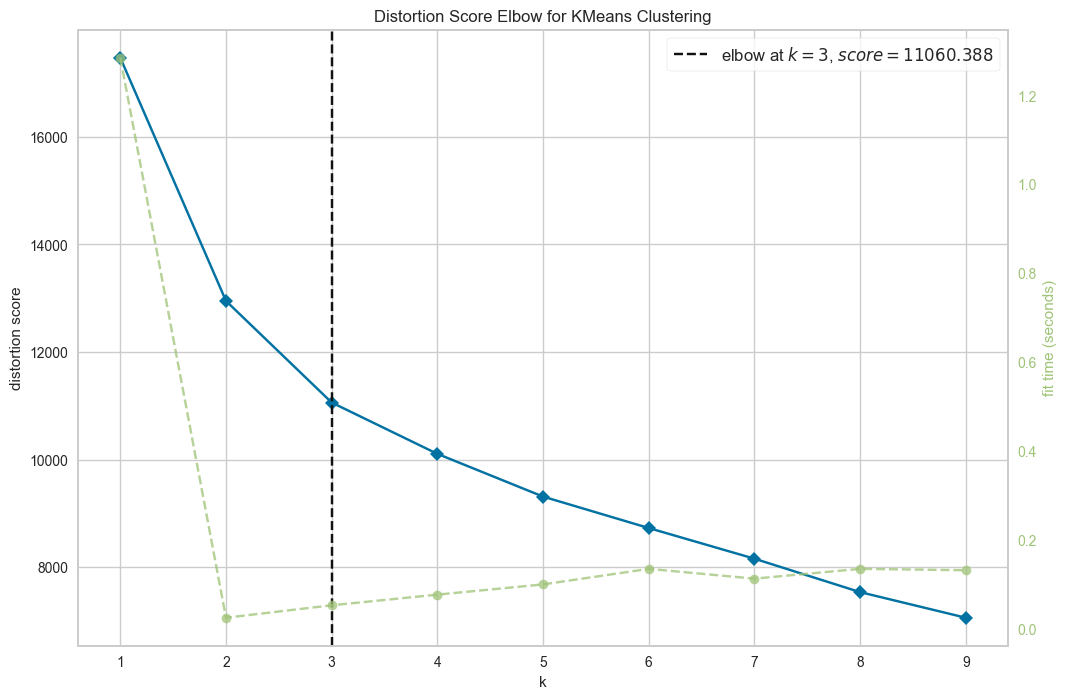

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=(1,10))
elbow_graph.fit(preprocessed_data)
elbow_graph.show()

In [18]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Clusters'] = kmeans.fit_predict(preprocessed_data) #fit the data and adding back clusters to the data in clusters column

In [19]:
from sklearn.metrics import silhouette_score
kmeans_labels = kmeans.fit_predict(preprocessed_data)
kmeans_score = silhouette_score(preprocessed_data, kmeans_labels)
print(kmeans_score)

0.2566948912719122


In [20]:
## with PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(preprocessed_data)
PCA_ds = pd.DataFrame(pca.transform(preprocessed_data))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2216.0,-1.378761e-16,1.658240,-2.702479,-1.462773,-0.244853,1.186011,10.134563
1,2216.0,2.565136e-17,1.155925,-5.179312,-0.701503,0.121015,0.848174,6.319324
2,2216.0,-8.016051e-17,1.019300,-2.524123,-0.749633,-0.015165,0.616136,4.097425


In [21]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.34867324, 0.51810057, 0.64984357])

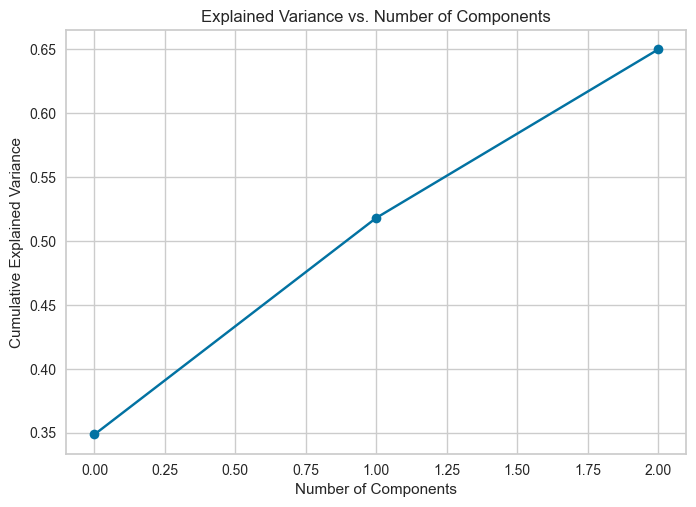

In [22]:
# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [23]:
PCA_ds.head()

,0,1,2
0,2.772191,-0.838335,-0.592980
1,-1.336558,0.421592,-0.033539
2,0.826032,0.789116,-0.614622
3,-1.923786,-0.614481,-0.113142
4,-0.253302,0.391565,-0.095554


Elbow Method to determine the number of clusters to be formed:


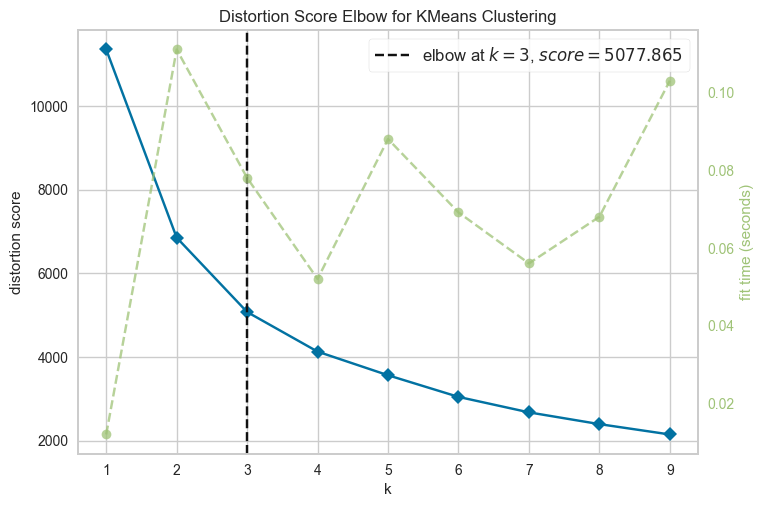

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=(1,10))
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [26]:
# Note: K-Means is a popular centroid-based clustering algorithm.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_ds)
kmeans_score = silhouette_score(PCA_ds, kmeans_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Ward linkage.
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(PCA_ds)
agglomerative_score = silhouette_score(PCA_ds, agglomerative_labels)

# Note: DBSCAN is a density-based clustering algorithm.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(PCA_ds)
dbscan_score = silhouette_score(PCA_ds, dbscan_labels)

# Note: GMM is a probabilistic model-based clustering algorithm.
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(PCA_ds)
gmm_score = silhouette_score(PCA_ds, gmm_labels)

# Note: Mean Shift is a non-parametric clustering algorithm.
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(PCA_ds)
mean_shift_score = silhouette_score(PCA_ds, mean_shift_labels)

# Note: Spectral Clustering uses the eigenvalues of the similarity matrix for clustering.
spectral = SpectralClustering(n_clusters=3, random_state=42)
spectral_labels = spectral.fit_predict(PCA_ds)
spectral_score = silhouette_score(PCA_ds, spectral_labels)

# Note: Affinity Propagation identifies exemplars and assigns data points to them.
affinity_propagation = AffinityPropagation()
affinity_propagation_labels = affinity_propagation.fit_predict(PCA_ds)
affinity_propagation_score = silhouette_score(PCA_ds, affinity_propagation_labels)

# Note: OPTICS is a density-based clustering algorithm providing a more flexible way to identify clusters.
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(PCA_ds)
optics_score = silhouette_score(PCA_ds, optics_labels)

In [27]:
print("K-Means Silhouette Score:", kmeans_score)
print("Agglomerative Silhouette Score:", agglomerative_score)
print("DBSCAN Silhouette Score:", dbscan_score)
print("GMM Silhouette Score:", gmm_score)
print("Mean Shift Silhouette Score:", mean_shift_score)
print("Spectral Clustering Silhouette Score:", spectral_score)
print("Affinity Propagation Silhouette Score:", affinity_propagation_score)
print("OPTICS Silhouette Score:", optics_score)

K-Means Silhouette Score: 0.383126745645806
Agglomerative Silhouette Score: 0.33729001724324126
DBSCAN Silhouette Score: 0.09730837637348413
GMM Silhouette Score: 0.3131827856756438
Mean Shift Silhouette Score: 0.7604240482017489
Spectral Clustering Silhouette Score: 0.39034161661389866
Affinity Propagation Silhouette Score: 0.3116900974808418
OPTICS Silhouette Score: -0.21324683714054068


In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_ds)
kmeans_score = silhouette_score(PCA_ds, kmeans_labels)
print(kmeans_score)

0.38312674564560134


In [36]:
data['Clusters'].value_counts()

Clusters
1    1099
2     836
0     281
Name: count, dtype: int64

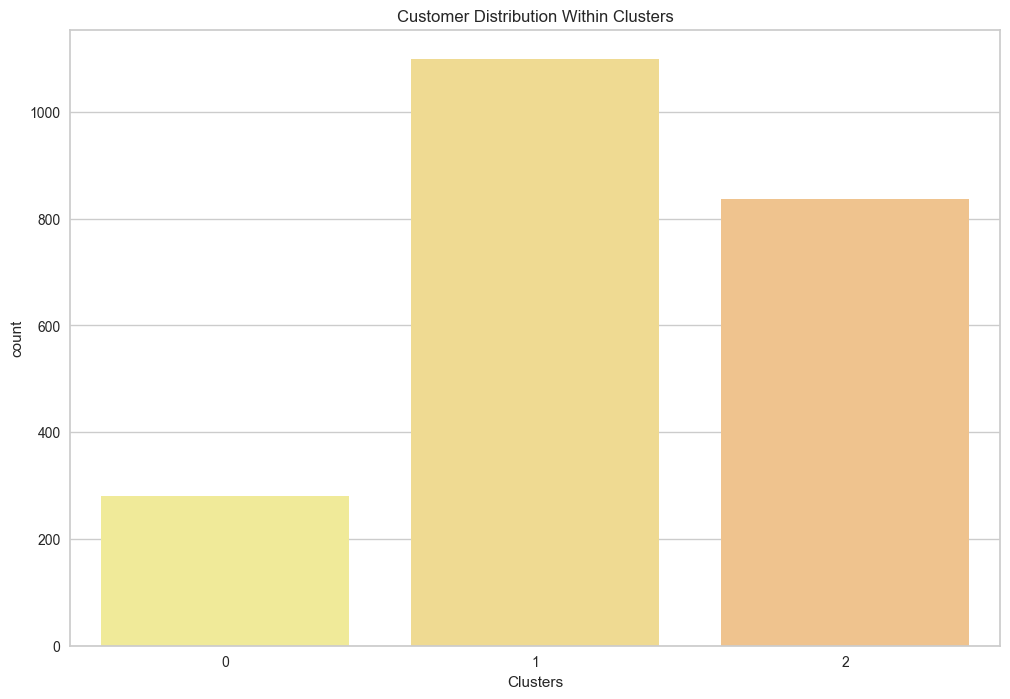

In [37]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=data, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()

### observations
 cluster 1 has highest number of customers
 

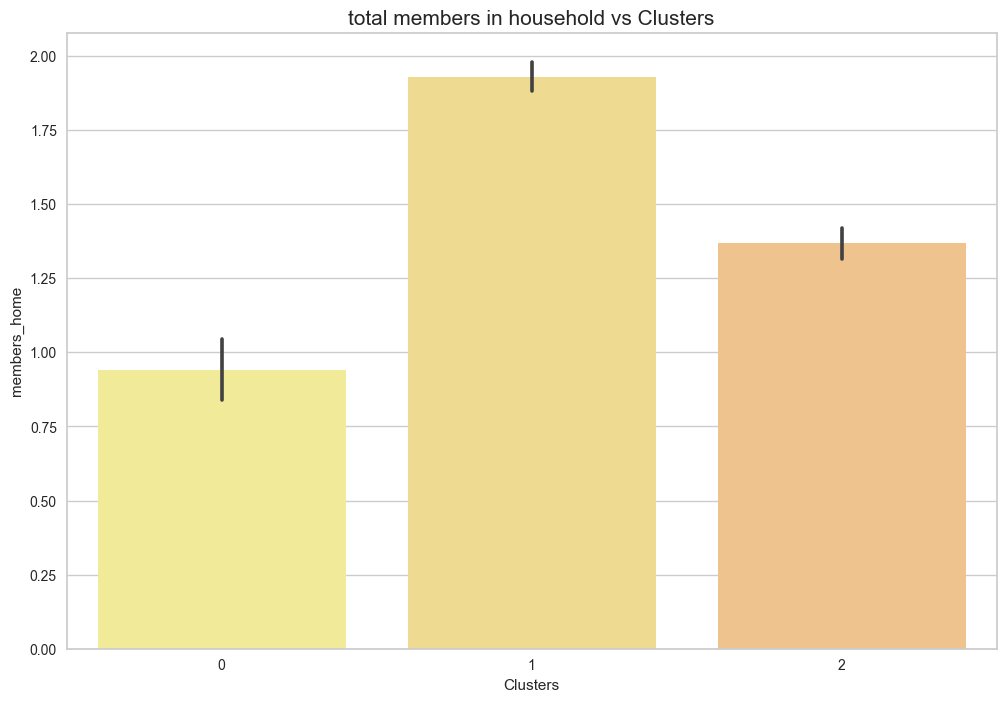

In [39]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data["Clusters"], y=data["members_home"],palette=palette)
plt.title("total members in household vs Clusters", size=15)
plt.show()

### observation

cluster 1 has the maximum number of household members

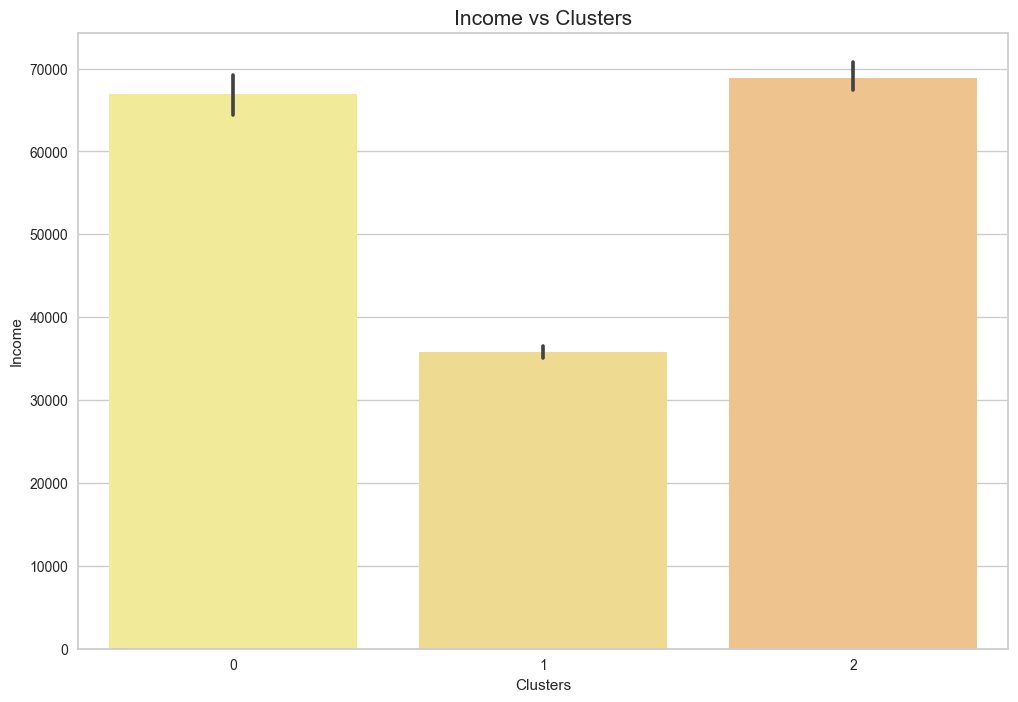

In [40]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data["Clusters"], y=data["Income"],palette=palette)
plt.title("Income vs Clusters", size=15)
plt.show()

### OBSERVATIONS

clusters 0 and 2 have the most income generating customers

In [51]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
# separate features and target column
X = data.drop('Clusters', axis=1)
y = data['Clusters']

In [92]:
X.shape

(2216, 9)

In [93]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [94]:
x_train.shape

(1551, 9)

In [95]:
x_train= preprocessor.fit_transform(x_train)
x_test= preprocessor.transform(x_test)

In [96]:

classfiier =  GradientBoostingClassifier(n_estimators=100,learning_rate=0.1).fit(x_train,y_train)

In [105]:
y_predict = classfiier.predict(x_test)

In [97]:
classfiier.score(x_test,y_test)

0.9774436090225563

In [98]:
import pickle

filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(classfiier, open(filename,'wb')) 

In [85]:
data['expenses'].min()

0

In [103]:
# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('classifier.pkl','rb'))

classifier.n_features_in_



    

10

In [106]:
filename1 = 'processor.pkl' # create a variable with name you wanna give to the file
pickle.dump(preprocessor, open(filename1,'wb')) 

In [44]:
data[numerical_cols].corr()

,Income,Response,Age,members_home,AcceptedCmp,num_purchases,expenses
Income,1.000000,0.133047,0.161791,-0.240148,0.179759,0.566873,0.658654
Response,0.133047,1.000000,-0.023692,-0.217987,0.387126,0.154237,0.270928
Age,0.161791,-0.023692,1.000000,0.071207,-0.031711,0.170055,0.118995
members_home,-0.240148,-0.217987,0.071207,1.000000,-0.144053,-0.203621,-0.402534
AcceptedCmp,0.179759,0.387126,-0.031711,-0.144053,1.000000,0.165206,0.298739
num_purchases,0.566873,0.154237,0.170055,-0.203621,0.165206,1.000000,0.739371
expenses,0.658654,0.270928,0.118995,-0.402534,0.298739,0.739371,1.000000


In [28]:
target = data['Clusters']

In [29]:
target

0       0
1       1
2       2
3       1
4       2
       ..
2211    2
2212    2
2213    2
2214    2
2215    1
Name: Clusters, Length: 2216, dtype: int32

In [30]:
preprocessed_data

array([[ 0.2340627 ,  2.37795178,  0.98644293, ...,  1.        ,
         0.        ,  1.        ],
       [-0.23455948, -0.42052997,  1.23680074, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.76947764, -0.42052997,  0.31882209, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.18809052, -0.42052997, -1.01641959, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.67538765, -0.42052997,  1.06989553, ...,  2.        ,
         1.        ,  0.        ],
       [ 0.02470453,  2.37795178,  1.23680074, ...,  2.        ,
         1.        ,  0.        ]])

In [31]:
 data_array = np.c_[preprocessed_data, np.array(target)]

In [44]:
preprocessed_data.shape

(2216, 10)

In [84]:
data_array.shape

(2216, 11)

In [33]:
X,y = (data_array[:,:-1],data_array[:,-1])

In [43]:
X.shape

(2216, 10)

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [40]:
x_train.shape

(1662, 10)

In [41]:
y_train.shape

(1662,)

In [42]:
x_test.shape

(554, 10)

In [74]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
classfiier =  GradientBoostingClassifier(n_estimators=100,learning_rate=0.1).fit(x_train,y_train)

In [76]:
y_predict = classfiier.predict(x_test)

In [82]:
classfiier.score(x_test,y_test)

0.98014440433213

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.98014440433213